# Name: Balakrishna Mupparaju
# Assignment: Week 9 & 10

# The Data Wrangling Workshop: Activity 7.01, page 388
This code scrapes the top 100 ebooks from Project Gutenberg and extracts ebook numbers and titles.

In [4]:
#import necessary libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re


In [6]:
#This section downloads the HTML page from Project Gutenberg’s Top 100 Ebooks list and parses it using BeautifulSoup.
# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)


In [8]:
#The function status_check() verifies if the request was successful (HTTP 200 OK).
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1


In [10]:
#This function helps check whether the webpage is accessible.
status_check(response)

Success!


1

In [12]:
#Extract the webpage content and decode it properly
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')


In [14]:
#The code initializes lst_links, an empty list to store extracted links (href attributes).

# Empty list to hold all the http links in the HTML page
lst_links=[]
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))
#This part collects all hyperlinks found on the webpage


In [16]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/categories',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 'pretty-pictures',
 '#books-last1']

In [18]:
booknum=[]

In [20]:
#The script iterates through lst_links, extracting numeric ebook identifiers.
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))


In [22]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)

#It filters out irrelevant links. It extracts ebook identifiers using regex ([0-9]+).  The script prints the ebook file numbers.


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 84, 2701, 8525, 1342, 1513, 11, 1023, 64317, 145, 2542, 37106, 100, 844, 2641, 174, 67979, 16389, 43, 2554, 26184, 394, 6761, 345, 2160, 6593, 1259, 4085, 98, 5197, 5200, 76097, 1400, 1998, 16328, 76, 1080, 1260, 1661, 25344, 4300, 28054, 1232, 3207, 2591, 1952, 41445, 4363, 45, 3296, 1184, 205, 34901, 2000, 7370, 768, 36034, 1497, 74, 2600, 135, 6130, 1727, 5740, 76087, 35899, 408, 219, 3300, 8800, 2650, 41360, 3201, 46, 2814, 8492, 829, 16119, 30254, 55, 120, 2852, 1399, 730, 10676]


In [24]:
print(soup.text[:2000])







Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Main Categories
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Ways to donate







To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not considered.


In [26]:
# Temp empty list of Ebook names
lst_titles_temp=[]


In [28]:
#Find index of the "Top 100 EBooks yesterday" section
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [30]:
# Collecting the 100 ebook titles
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])


In [32]:
#Clean and Format Ebook Titles
#The script uses regex to extract proper book titles by removing extra characters.
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])


In [34]:
#Finally, the script prints all cleaned ebook titles:

for l in lst_titles:
    print(l)
#Removed unnecessary characters using regex (^[a-zA-Z ]*). Extracts cleaned book titles.

Frankenstein
Moby Dick
Eve
Pride and Prejudice by Jane Austen 
Romeo and Juliet by William Shakespeare 
Alice
Bleak House by Charles Dickens 
The Great Gatsby by F
Middlemarch by George Eliot 
A Doll
Little Women
The Complete Works of William Shakespeare by William Shakespeare 
The Importance of Being Earnest
A Room with a View by E
The Picture of Dorian Gray by Oscar Wilde 
The Blue Castle
The Enchanted April by Elizabeth Von Arnim 
The Strange Case of Dr
Crime and Punishment by Fyodor Dostoyevsky 
Simple Sabotage Field Manual by United States
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Ferdinand Count Fathom 
Dracula by Bram Stoker 
The Expedition of Humphry Clinker by T
History of Tom Jones
Twenty years after by Alexandre Dumas and Auguste Maquet 
The Adventures of Roderick Random by T
A Tale of Two Cities by Charles Dickens 
My Life 
Metamorphosis by Franz Kafka 
The art of writing and speaking the English language 
Great Expectations by Charles Dickens 
Thus Spake Za

# 7.2 The Data Wrangling Workshop: Activity 7.02, page 390

In [84]:
import urllib.request, urllib.parse, urllib.error
import json

# Load the secret API key from the JSON file
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']



In [86]:
#serviceurl holds the base API URL. apikey appends the API key for authentication.
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey=' + omdbapi



In [88]:
#The function print_json() extracts specific movie details from the JSON response.
#list_keys defines the movie attributes to display.  Iterates through keys in JSON response. Prints only available movie details.
def print_json(json_data):
    list_keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
                 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
                 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-" * 50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-" * 50)


In [90]:
#The function save_poster() downloads and stores the movie poster.
#Retrieves poster URL from JSON response. Extracts file extension dynamically. Downloads and saves the poster in a Posters/ directory.
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']

    # Extract file extension from poster URL
    poster_file_extension = poster_url.split('.')[-1]

    # Read the image file from the URL
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation = os.getcwd() + '\\' + 'Posters' + '\\'

    # Create directory if it doesn't exist
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)

    # Save poster with proper filename
    filename = savelocation + str(title) + '.' + poster_file_extension
    f = open(filename, 'wb')
    f.write(poster_data)
    f.close()


In [92]:
#The function search_movie() queries OMDB API and retrieves movie data.
"""Builds API query using urllib.parse.urlencode().  Requests movie data from OMDB API.
Parses JSON response using json.loads(). Handles errors by checking "Response" key. 
If a valid poster is available, downloads it."""
def search_movie(title):
    try:
        # Construct API request URL
        url = serviceurl + urllib.parse.urlencode({'t': str(title)}) + apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)

        # Fetch movie data
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data = json.loads(data)

        # Check if API response is valid
        if json_data['Response'] == 'True':
            print_json(json_data)

            # Ask user if poster should be saved
            if json_data['Poster'] != 'N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ", json_data['Error'])

    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")


In [96]:
#The script searches for "Titanic" and a non-existent "Random_error" movie.
#Calls search_movie("Titanic") - Retrieves data for Titanic. Calls search_movie("Random_error") - Should return an error.
search_movie("Titanic")
search_movie("Random_error")


Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=b37a28be
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,334,872
imdbID: tt0120338
--------------------------------------------------
Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=b37a28be
Error encountered:  Movie not

# 3. Connect to an API of your choice and do a simple data pull - you can use any API -

In [99]:
import requests
import pandas as pd


In [101]:
# API base URL
base_url = "https://www.alphavantage.co/query"

# API key 
api_key = "19IUCK3K3ZLSIV1G"

# Define tickers for retrieval
tickers = ["AAPL", "MSFT", "GOOGL"]  # Example tickers


In [105]:
# Placeholder for storing data
api_data = []

for ticker in tickers:
    # Define API request parameters
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": ticker,
        "apikey": api_key
    }
    
    # Perform GET request
    response = requests.get(base_url, params=params)
    data = response.json()
    
    # Extract time series data if available
    if "Time Series (Daily)" in data:
        time_series = data["Time Series (Daily)"]
        for date, values in time_series.items():
            api_data.append({
                "Ticker": ticker,
                "Date": date,
                "Open": float(values.get("1. open", 0)),
                "High": float(values.get("2. high", 0)),
                "Low": float(values.get("3. low", 0)),
                "Close": float(values.get("4. close", 0)),
                "Volume": int(values.get("5. volume", 0))
            })
    else:
        print(f"Error fetching data for {ticker}: {data.get('Note', 'Unknown error')}")


In [107]:
# Convert list to DataFrame
api_df = pd.DataFrame(api_data)

# Display subset of cleaned data
print(api_df.head())


  Ticker        Date    Open      High       Low   Close    Volume
0   AAPL  2025-05-16  212.36  212.5700  209.7700  211.26  53259006
1   AAPL  2025-05-15  210.95  212.9600  209.5400  211.45  45029473
2   AAPL  2025-05-14  212.43  213.9400  210.5801  212.33  49325825
3   AAPL  2025-05-13  210.43  213.4000  209.0000  212.93  51909332
4   AAPL  2025-05-12  210.97  211.2679  206.7500  210.79  63775814


# 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code if you are using Pycharm, otherwise if you submit a notebook file make sure your plots are visible in your notebook or PDF that you submit. You are free to use Matplotlib, Seaborn or another package if you prefer.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Kaggle dataset
kaggle_data = pd.read_csv("/Users/balakrishnamupparaju/Downloads/financials.csv")

# Set style for Seaborn
sns.set_style("whitegrid")


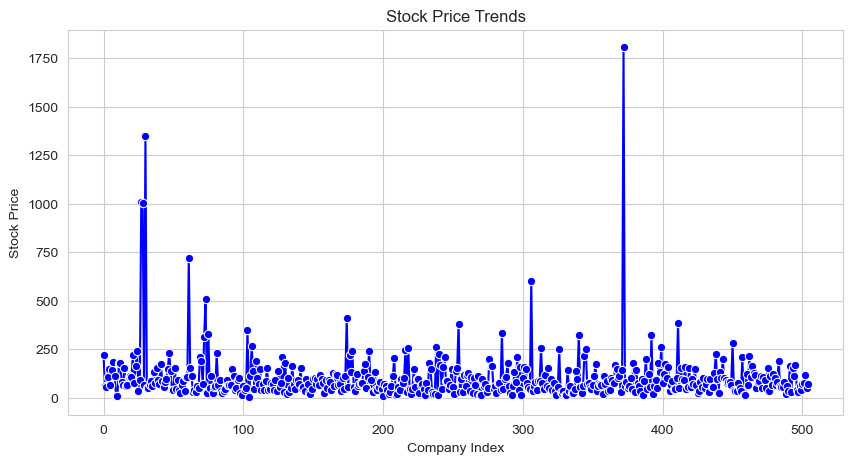

In [37]:
# a. Line Plot (Stock Price Trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=kaggle_data.index, y=kaggle_data["Price"], marker="o", color="blue")

plt.xlabel("Company Index")
plt.ylabel("Stock Price")
plt.title("Stock Price Trends")
plt.show()


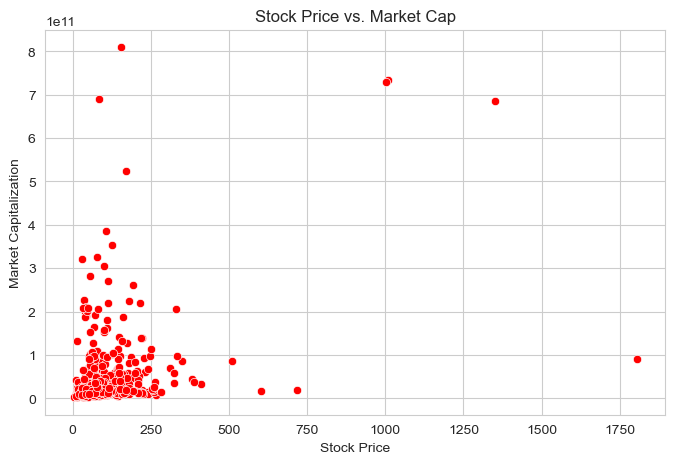

In [40]:
#b. Scatter Plot (Price vs. Market Cap)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=kaggle_data["Price"], y=kaggle_data["Market Cap"], color="red")

plt.xlabel("Stock Price")
plt.ylabel("Market Capitalization")
plt.title("Stock Price vs. Market Cap")
plt.show()


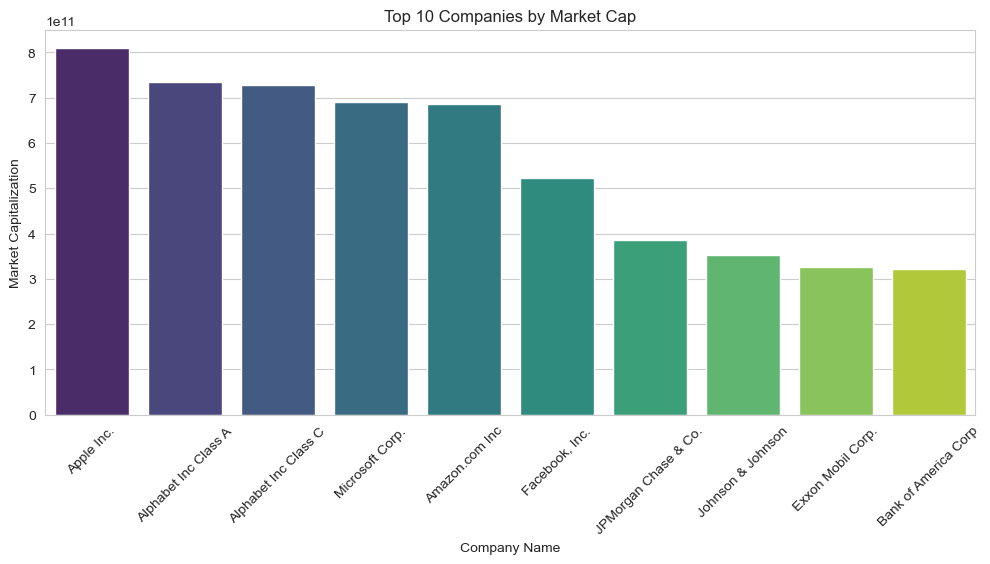

In [42]:
#c. Bar Plot (Top 10 Companies by Market Cap)

import warnings
warnings.filterwarnings("ignore")
top_10 = kaggle_data.nlargest(10, "Market Cap")

plt.figure(figsize=(12, 5))
sns.barplot(x=top_10["Name"], y=top_10["Market Cap"], palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Company Name")
plt.ylabel("Market Capitalization")
plt.title("Top 10 Companies by Market Cap")
plt.show()


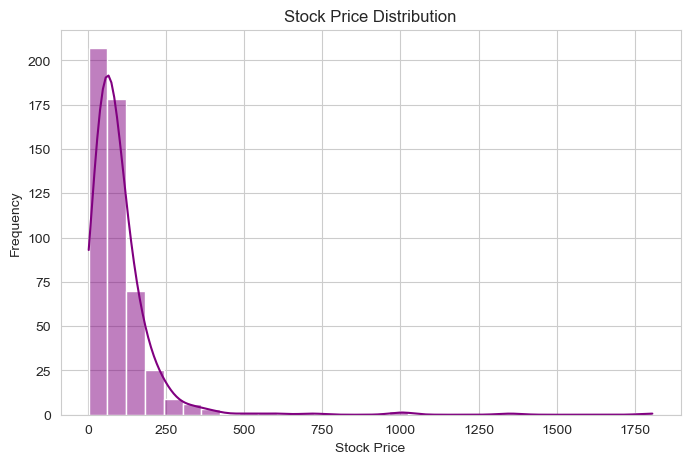

In [44]:
#d. Histogram (Stock Price Distribution)
plt.figure(figsize=(8, 5))
sns.histplot(kaggle_data["Price"], bins=30, color="purple", kde=True)

plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.title("Stock Price Distribution")
plt.show()


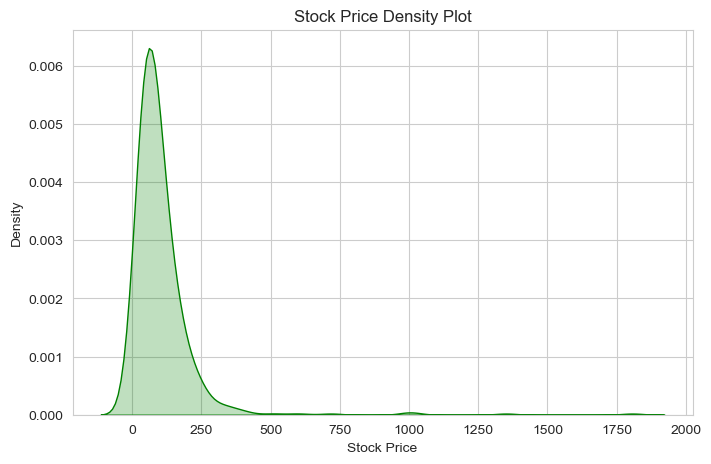

In [47]:
#e. Density Plot (Stock Price Density)
plt.figure(figsize=(8, 5))
sns.kdeplot(kaggle_data["Price"], fill=True, color="green")

plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.title("Stock Price Density Plot")
plt.show()


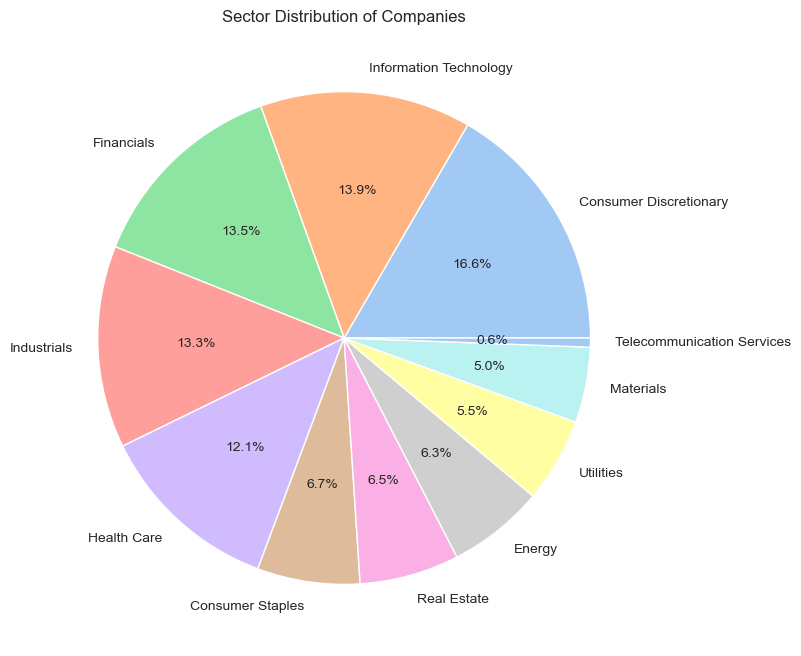

In [49]:
#f. Pie Chart (Sector Distribution)
sector_counts = kaggle_data["Sector"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))

plt.title("Sector Distribution of Companies")
plt.show()
